# Heun Methods

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import warnings

warnings.filterwarnings("ignore")

num_steps = 100000

### First-order ODE:

 y' = 2x + 1, y(0) = 0

N: 100000
Time taken by Taylor Series method: 189.0657
Per Mean error: 0.0000


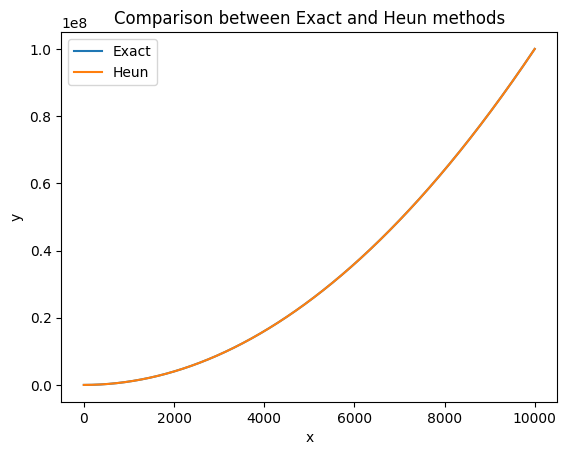

In [67]:
# define the ODE
def f(x, y):
    return 2*x + 1

# define the exact solution
def y_exact(x):
    return x*(x + 1)

# define the Heun method
def heun(f, x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    x[0] = x0
    y[0] = y0
    for i in range(n):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h, y[i] + h*k1)
        y[i+1] = y[i] + h/2*(k1 + k2)
        x[i+1] = x[i] + h
    return x, y

# set initial conditions and parameters
x0 = 0
y0 = 0
h = 0.1
# num_steps = 100

# solve the ODE using Heun method
start_time = time()
x_heun, y_heun = heun(f, x0, y0, h, num_steps)
heun_time = (time() - start_time) * 1000

# compute the exact solution
x_exact = np.linspace(x0, x0 + num_steps*h, num_steps+1)
y_exact = y_exact(x_exact)

# compute the error
error = np.abs(y_exact - y_heun)
per_error = np.mean(np.abs(error/y_exact)[1:])*100

# Print the time taken by each method
print(f"N: {num_steps}")
print(f"Time taken by Taylor Series method: {heun_time:.4f}")
print(f"Per Mean error: {per_error:.4f}")

# plot the results
plt.plot(x_exact, y_exact,  label='Exact')
plt.plot(x_heun, y_heun,  label='Heun')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison between Exact and Heun methods')
plt.show()



### Second-order ODE:

y'' + y = sin(x), y(0) = 0, y'(0) = 1

N: 100000
Time taken by Taylor Series method: 937.6073
Per Mean error: 286.3791


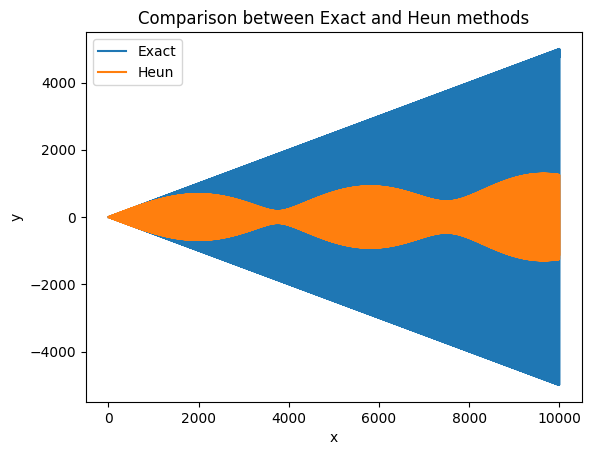

In [68]:
# define the ODE
def f(x, y):
    return np.array([y[1], np.sin(x) - y[0]])

# define the exact solution
def y_exact(x):
    return 0.5*(3*np.sin(x) - x*np.cos(x))

# define the Heun method
def heun(f, x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros((n+1, 2))
    x[0] = x0
    y[0] = y0
    for i in range(n):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h, y[i] + h*k1)
        y[i+1] = y[i] + h/2*(k1 + k2)
        x[i+1] = x[i] + h
    return x, y[:, 0]

# set initial conditions and parameters
x0 = 0
y0 = np.array([0, 1])
h = 0.1
# num_steps = 100

# solve the ODE using Heun method
start_time = time()
x_heun, y_heun = heun(f, x0, y0, h, num_steps)
heun_time = (time() - start_time) * 1000

# compute the exact solution
x_exact = np.linspace(x0, x0 + num_steps*h, num_steps+1)
y_exact = y_exact(x_exact)

# compute the error
error = np.abs(y_exact - y_heun)
per_error = np.mean(np.abs(error/y_exact)[1:])*100

# Print the time taken by each method
print(f"N: {num_steps}")
print(f"Time taken by Taylor Series method: {heun_time:.4f}")
print(f"Per Mean error: {per_error:.4f}")

# plot the results
plt.plot(x_exact, y_exact,  label='Exact')
plt.plot(x_heun, y_heun,  label='Heun')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison between Exact and Heun methods')
plt.show()

### Third-order ODE:

y''' + y'' + y' + y = 2x - 1, y(0) = 1, y'(0) = 0, y''(0) = 0

N: 100000
Time taken by Taylor Series method: 754.1695
Per Mean error: 0.0413


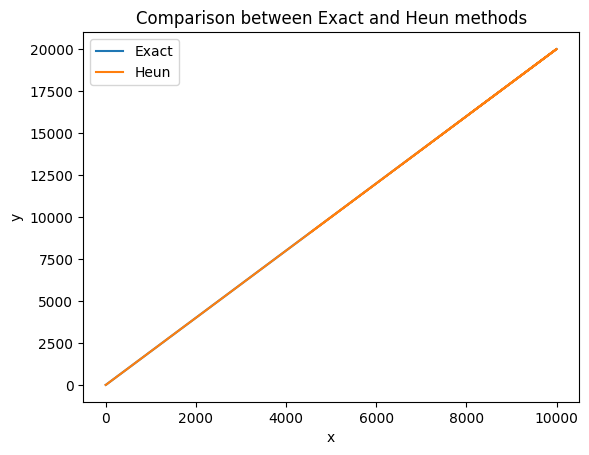

In [71]:
# define the ODE
def f(x, y):
    return np.array([y[1], y[2], -y[2] - y[1] - y[0] + 2*x - 1])

# define the exact solution
def y_exact(x):
    return 2*x + 2*np.exp(-x) + 2*np.cos(x) - 3

# define the Heun method
def heun(f, x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros((n+1, 3))
    x[0] = x0
    y[0] = y0
    for i in range(n):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h, y[i] + h*k1)
        y[i+1] = y[i] + h/2*(k1 + k2)
        x[i+1] = x[i] + h
    return x, y[:, 0]

# set initial conditions and parameters
x0 = 0
y0 = np.array([1, 0, 0])
h = 0.1
# num_steps = 100

# solve the ODE using Heun method
start_time = time()
x_heun, y_heun = heun(f, x0, y0, h, num_steps)
heun_time = (time() - start_time) * 1000

# compute the exact solution
x_exact = np.linspace(x0, x0 + num_steps*h, num_steps+1)
y_exact = y_exact(x_exact)

# compute the error
error = np.abs(y_exact - y_heun)
per_error = np.mean(np.abs(error/y_exact)[1:])*100

# Print the time taken by each method
print(f"N: {num_steps}")
print(f"Time taken by Taylor Series method: {heun_time:.4f}")
print(f"Per Mean error: {per_error:.4f}")

# plot the results
plt.plot(x_exact, y_exact, label='Exact')
plt.plot(x_heun, y_heun, label='Heun')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison between Exact and Heun methods')
plt.show()

### Fourth-order ODE:

y'''' + 4y'' + 4y = 0, y(0) = 1, y'(0) = 0, y''(0) = 0, y'''(0) = -4

N: 100000
Time taken by Taylor Series method: 1234.8459
Per Mean error: 16412.9806


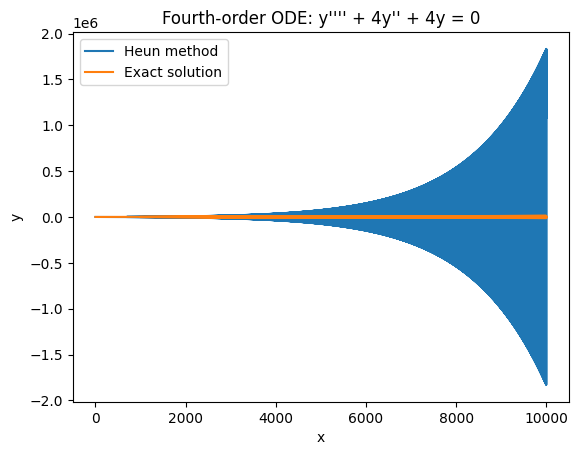

In [70]:
def f(x, y):
    return np.array([y[1], y[2], y[3], -4*y[2]-4*y[0]])

def exact_solution(x):
    return ((x - 1) * np.sin(np.sqrt(2) * x)) / np.sqrt(2) + (x + 1) * np.cos(np.sqrt(2) * x)

def heun_method(f, x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros((n+1, 4))
    x[0] = x0
    y[0] = y0

    for i in range(n):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h, y[i] + h * k1)
        y[i+1] = y[i] + h * (k1 + k2) / 2
        x[i+1] = x[i] + h

    return x, y[:, 0]

# Initial conditions
x0 = 0
y0 = np.array([1, 0, 0, -4])
h = 0.1
# num_steps = 100

# Exact solution
x_exact = np.linspace(x0, x0 + num_steps*h, num_steps+1)
y_exact = exact_solution(x_exact)

# Heun method
start_time = time()
x_heun, y_heun = heun_method(f, x0, y0, h, num_steps)
heun_time = (time() - start_time) * 1000

# compute the error
error = np.abs(y_exact - y_heun)
per_error = np.mean(np.abs(error/y_exact)[1:])*100

# Print the time taken by each method
print(f"N: {num_steps}")
print(f"Time taken by Taylor Series method: {heun_time:.4f}")
print(f"Per Mean error: {per_error:.4f}")

# Plotting
plt.plot(x_heun, y_heun, label='Heun method')
plt.plot(x_exact, y_exact, label='Exact solution')
plt.title("Fourth-order ODE: y'''' + 4y'' + 4y = 0")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
